In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.shape

(50000, 2)

In [5]:

data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [6]:
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

In [7]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [8]:
data['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

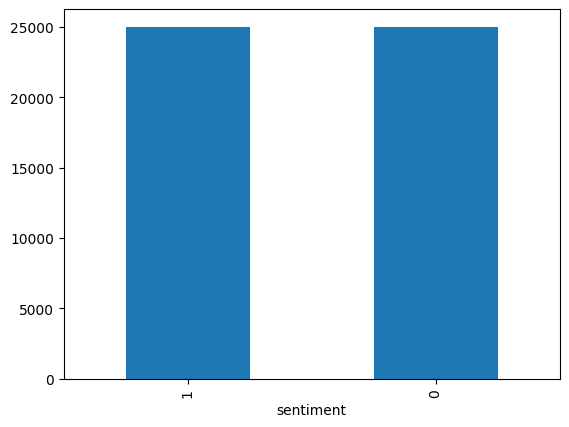

In [9]:
data['sentiment'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'sentiment distribution')

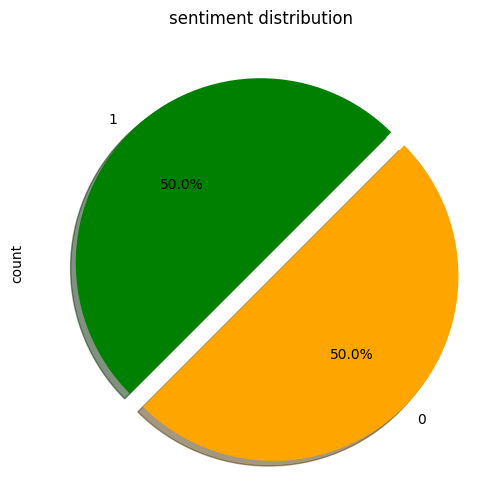

In [10]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
data['sentiment'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('sentiment distribution')

Working With Text

In [11]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [13]:
data['review'][12]

'So im not a big fan of Boll\'s work but then again not many are. I enjoyed his movie Postal (maybe im the only one). Boll apparently bought the rights to use Far Cry long ago even before the game itself was even finsished. <br /><br />People who have enjoyed killing mercs and infiltrating secret research labs located on a tropical island should be warned, that this is not Far Cry... This is something Mr Boll have schemed together along with his legion of schmucks.. Feeling loneley on the set Mr Boll invites three of his countrymen to play with. These players go by the names of Til Schweiger, Udo Kier and Ralf Moeller.<br /><br />Three names that actually have made them selfs pretty big in the movie biz. So the tale goes like this, Jack Carver played by Til Schweiger (yes Carver is German all hail the bratwurst eating dudes!!) However I find that Tils acting in this movie is pretty badass.. People have complained about how he\'s not really staying true to the whole Carver agenda but we

# Cleaning steps

removing HTML Tags

extracting emojies # The pattern re.compile('(?::|;|=)(?:-)?(?:)|(|D|P)') is a regular expression used to match and extract emojis from a 

given text.

removing special chars,puntuation,sumbols

lower casing

removing stopwords

tokenization

In [14]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [16]:
# Define stopwords set
stopwords_set = set(stopwords.words('english'))

# Use raw string for the regex pattern
emoji_pattern = re.compile(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]*>', '', text)
    
    # Find all emojis
    emojis = emoji_pattern.findall(text)
    
    # Replace non-word characters with space and append emojis
    text = re.sub(r'[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    # Initialize PorterStemmer
    prter = PorterStemmer()
    
    # Stem words and remove stopwords
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)

In [17]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world :)'

In [18]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [19]:
data['review'] = data['review'].apply(lambda x: preprocessing(x))

In [20]:
data['review']

0        one review mention watch 1 oz episod hook righ...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic famili littl boy jake think zombi closet...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job creativ origin fir...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    go disagre previou comment side maltin one sec...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object

In [21]:
data['review'][23]

'first let get thing straight anim fan alway matter fact use watch speed racer time preschool b like sever b movi hilari c like godzilla movi lot move movi first come seem like go usual b movi crappi fx sudden boom anim come movi goe wwwaaaaayyyyy downhil anim bad cheap even wors rememb speed racer crissak fact cheap one scene movi vividli rememb bunch kid run school kid fx terribl dinosaur look wors godzilla addit transit live action anim unorgan dialogu voic especi english dub view horrid beg dad take tape dvd vh player thing kept surviv crack joke comment like robot joel mike mst3k pick season honestli way bare enjoy movi surviv time heck plan show anoth fellow otaku pal mine halloween b movi night stupid pretti pain watch unintent hilari time give movi 3 10 improv 0 5 10 origin go give accord grade scale 3 10 mean pretti much bore bad fun count three unless find way make fun becom fun count 15'

Visualizing Negative and Positive Words

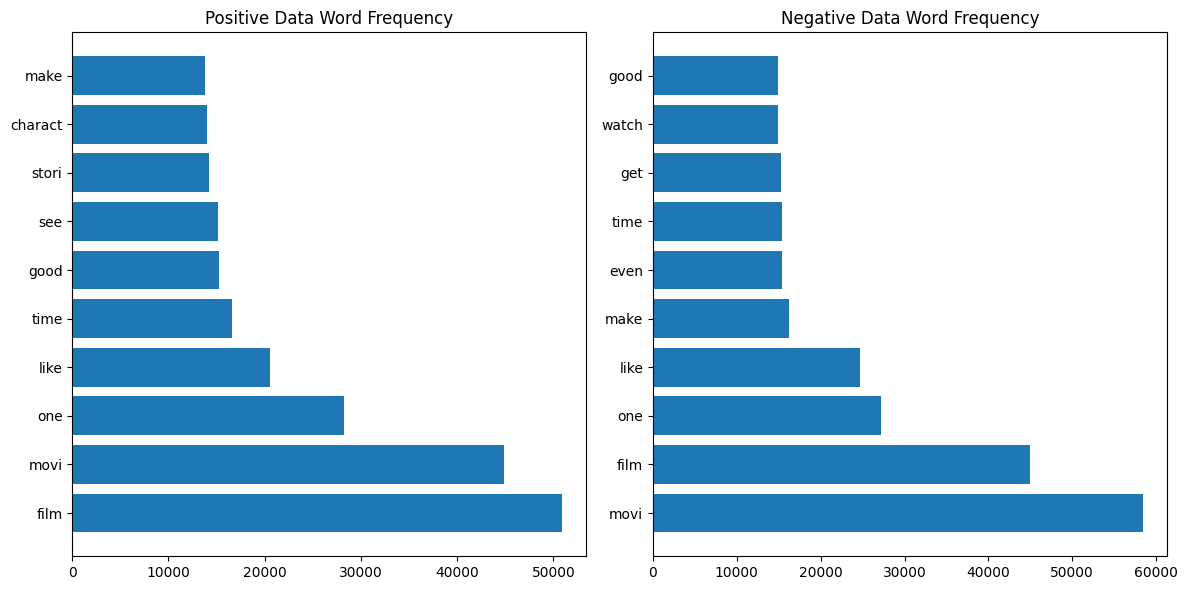

In [24]:
positive_data = data[data['sentiment'] == 1]
positive_data = positive_data['review']
negative_data = data[data['sentiment'] == 0]
negative_data = negative_data['review']


import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positive_words = ' '.join(positive_data).split()
positive_data_words_counts = Counter(positive_words)
positive_common_words = positive_data_words_counts.most_common(10)

# Negative data
negative_data_words = ' '.join(negative_data).split()
negative_data_word_counts = Counter(negative_data_words)
negative_data_common_words = negative_data_word_counts.most_common(10)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(negative_data_common_words)), [count for _, count in positive_common_words], align='center')
axes[0].set_yticks(range(len(positive_common_words)))
axes[0].set_yticklabels([word for word, _ in positive_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negative_data_common_words)), [count for _, count in negative_data_common_words], align='center')
axes[1].set_yticks(range(len(negative_data_common_words)))
axes[1].set_yticklabels([word for word, _ in negative_data_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()

TF-IDF Vertorizer to convert the raw documents into feature matrix

In [25]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None, use_idf=True, norm='l2', smooth_idf=True)
y=data.sentiment.values
x=tfidf.fit_transform(data.review)

Training Machine Learning Model for Sentiment Analysis

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.4, random_state=1, shuffle=False)

In [28]:
from sklearn.linear_model import LogisticRegressionCV

clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)

y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   16.0s remaining:   16.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   16.4s finished


In [29]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8908


In [30]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [46]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction

In [47]:
prediction = prediction('grew b 1965 watch love thunderbird mate school watch play thunderbird school lunch school want virgil scott one want alan count 5 becam art form took children see movi hope would get glimps love child bitterli disappoint high point snappi theme tune could compar origin score thunderbird thank earli saturday morn one televis channel still play rerun seri gerri anderson wife creat jonatha frake hand director chair version complet hopeless wast film utter rubbish cgi remak may accept replac marionett homo sapien subsp sapien huge error judgment')

In [48]:
if prediction == 1:
    print("positive comment")
else:
    print("negative comment")

negative comment


In [36]:
data['review'][49997]

'cathol taught parochi elementari school nun taught jesuit priest high school colleg still practic cathol would consid good cathol church eye believ certain thing act certain way church tell back movi bad two peopl kill nun suppos satir embodi femal religi figurehead comedi satir done well act dian keaton never saw play differ movi may good first thought gun might fake first shoot plan femal lead four former student attempt demonstr sister mari emot intellectu bigotri faith turn bullet real stori tragedi tragedi loss life besid two former student live abort babi life student mom tragedi dogmat author love peopl tragedi organ religion replac true faith god wrong today islam yesterday judaism christian'

In [49]:
data['review'][0]

'one review mention watch 1 oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'